# <font color = 'orange'> Regression Using ANN

---

### <font color = 'blue'> Importing libraries

In [1]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

D:\Anconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
housing = fetch_california_housing()

housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

---

### <font color = 'blue'> Independent and Dependent Variable

In [5]:
x = pd.DataFrame(housing['data'], columns = housing['feature_names'])

x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
# droping useless columns
x.drop(['Latitude', 'Longitude'],axis = 1, inplace = True)

In [7]:
y = pd.DataFrame(housing['target'], columns = housing['target_names'])

y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


---

### <font color = 'blue'> Train Test Split

In [8]:
# train and test split 
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, random_state = 42)

# train and validation split
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state = 42)

In [9]:
print(x_train_full.shape,'\n')

print(x_train.shape)
print(x_valid.shape,'\n')

print(y_train.shape,'\n')

(15480, 6) 

(11610, 6)
(3870, 6) 

(11610, 1) 



---

### <font color = 'blue'> Standard Scaling

In [10]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

# we will use same mean and standard deviation of the training data and transform the test and validation data
# to avoid the data leakage on the test and validation data
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

---

## Architecture Used

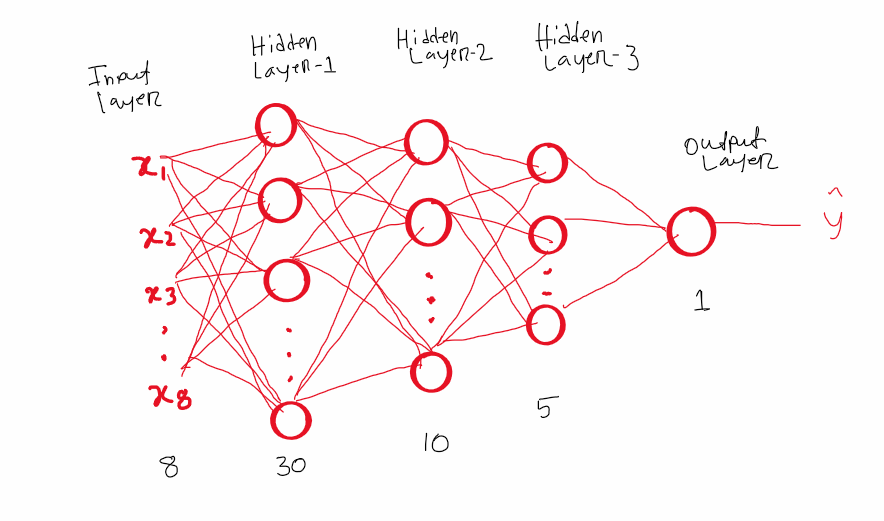

### <font color = 'red'> Correction in image :
* We will get 6 input feature not 8.

---

### <font color = 'blue'> Creating Neural Network Model

In [11]:
LAYERS = [
    tf.keras.layers.Input(6, name = 'Input_layer'),
    tf.keras.layers.Dense(30, activation = 'relu', name = 'layer_1'),
    tf.keras.layers.Dense(10, activation = 'relu', name = 'layer_2'),
    tf.keras.layers.Dense(5, activation = 'relu', name = 'layer_3'),
    tf.keras.layers.Dense(1, activation = 'relu', name = 'Output_layer')
]

model_rgs = tf.keras.models.Sequential(LAYERS) 

---

### <font color = 'blue'> Compile the Model

In [12]:
Loss_function = 'mse'
Optimizer = 'SGD'

model_rgs.compile(loss = Loss_function, optimizer = Optimizer)

---

In [13]:
model_rgs.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 30)                210       
                                                                 
 layer_2 (Dense)             (None, 10)                310       
                                                                 
 layer_3 (Dense)             (None, 5)                 55        
                                                                 
 layer_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 581 (2.27 KB)
Trainable params: 581 (2.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---

### <font color = 'blue'> Model Training

In [14]:
Epochs = 20 
validation_set = (x_valid, y_valid)

history = model_rgs.fit(x_train, y_train, epochs = Epochs, validation_data = validation_set)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.8719 - val_loss: 0.5026
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5077 - val_loss: 0.4482
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4734 - val_loss: 0.4382
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4783 - val_loss: 0.4201
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4554 - val_loss: 0.4302
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4533 - val_loss: 0.4098
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4355 - val_loss: 0.5254
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4307 - val_loss: 0.4427
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4292 - val_loss: 0.4217
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4258 - val_loss: 0.4099

In [15]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.871904,0.502607
1,0.507691,0.448237
2,0.473380,0.438178
3,0.478339,0.420118
4,0.455430,0.430176
5,0.453341,0.409769
6,0.435530,0.525397
7,0.430725,0.442720
8,0.429198,0.421677
9,0.425787,0.409919


<AxesSubplot:>

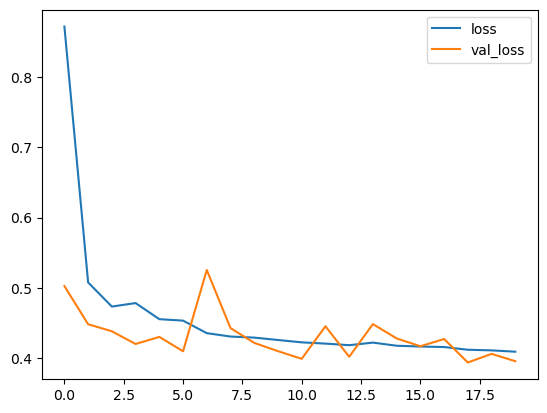

In [16]:
pd.DataFrame(history.history).plot()

---

In [17]:
model_rgs.evaluate(x_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4121


0.41213634610176086

---

### <font color = 'blue'> Output Prediction

In [18]:
new = x_test[0]

new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735])

In [27]:
# [new] because 1,6 is the input
model_rgs.predict(new.reshape(1,6))

1/1 [==============================] - 0s 76ms/step


array([[0.9331588]], dtype=float32)

---

## <font color = 'blue'> Model with Callbacks

In [28]:
model_2 = tf.keras.models.Sequential(LAYERS)

LOSS = "mse"
# stocastic gradient descent optimizers
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=1e-3)

model_2.compile(loss=LOSS , optimizer=OPTIMIZER)

EPOCHS = 20

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True) # used to the best model
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir="logs")

CALLBACKS = [checkpoint_cb, early_stopping_cb, tensorboard_cb]


history = model_2.fit(x_train, y_train, epochs = EPOCHS, validation_data=(x_valid, y_valid), callbacks = CALLBACKS)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4025 - val_loss: 0.3879
Epoch 2/20
 31/363 [=>............................] - ETA: 1s - loss: 0.4297

C:\Users\darsh\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 1s 4ms/step - loss: 0.4014 - val_loss: 0.3895
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4013 - val_loss: 0.3950
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4011 - val_loss: 0.3965
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4008 - val_loss: 0.3953
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4006 - val_loss: 0.3975


In [29]:
%load_ext tensorboard

In [30]:
%tensorboard --logdir="logs"

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

---